In [1]:
#MLP로 MNIST분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#입력과 출력 지정하기
in_size = 28*28
out_size = 10

In [3]:
#MNIST 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#데이터를 28*28 = 784 1차원 배열로 변환하기
X_train = X_train.reshape(-1, 784).astype('float32')/255
X_test = X_test.reshape(-1, 784).astype('float32')/255

#레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)

In [4]:
#MLP 모델 구조 정의하기
model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation= 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
#모델 컴파일하기
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(),
             metrics= ['accuracy'])

In [6]:
#학습하기
hist = model.fit(X_train, y_train,
                batch_size = 128,
                epochs = 50,
                verbose = 1,
                validation_data = (X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 228us/step - loss: 0.2430 - accuracy: 0.9244 - val_loss: 0.0948 - val_accuracy: 0.9694
Epoch 2/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.1014 - accuracy: 0.9691 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 3/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.0750 - accuracy: 0.9772 - val_loss: 0.0705 - val_accuracy: 0.9788
Epoch 4/50
60000/60000 [==============================] - 14s 228us/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0717 - val_accuracy: 0.9804
Epoch 5/50
60000/60000 [==============================] - 14s 226us/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0696 - val_accuracy: 0.9813
Epoch 6/50
60000/60000 [==============================] - 14s 226us/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0827 - val_accuracy: 0.9797
Epoch 7/50
60000/60000 [==============================]

In [7]:
#모델 평가하기
score= model.evaluate(X_test, y_test, verbose = 1)
print('정답률 = ', score[1], 'loss = ', score[0])

10000/10000 [==============================] - 1s 108us/step
정답률 =  0.9835000038146973 loss =  0.19195047024059564


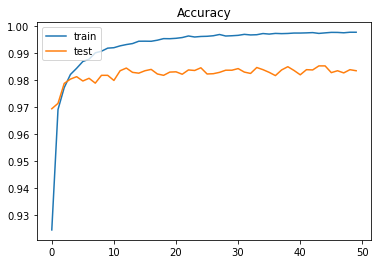

In [8]:
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

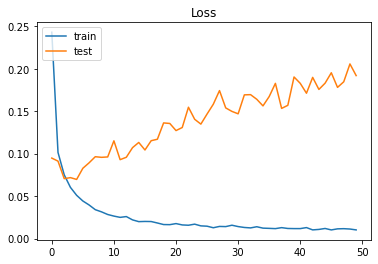

In [9]:
#손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()